# AM2061 Algorithm 2-3
## Newtons Method

Newtons Method is an algoritm used to determine the roots of Non-linear functions. 

It uses a Taylor expansion of the function about the root $p$.

A brief explanation is as follows:

* We must first provide an initial guess $p_0$, if this guess is too far from the actual, issues may arise. (related to Fixed Point Theorem)

* Upon doing so, we can then employ the sequence:

\begin{equation} p_n = p_{n-1} - \frac{f(p_{n-1})}{f'(p_{n-1})} \end{equation}

* To do this, we simply:
  * Set $p = p_0 - \frac{f(p_0)}{f'(p_0)}$
  * Perform our check.
  * Set $p_0 = p$
    
* We repeat this procedure until either:
  * $\left | p - p_0 \right | < ERR$, so we have found the root within the allowed error. (successful state)
  * At max number of iterations. (unsuccessful state)

The following is the pseudocode provided:

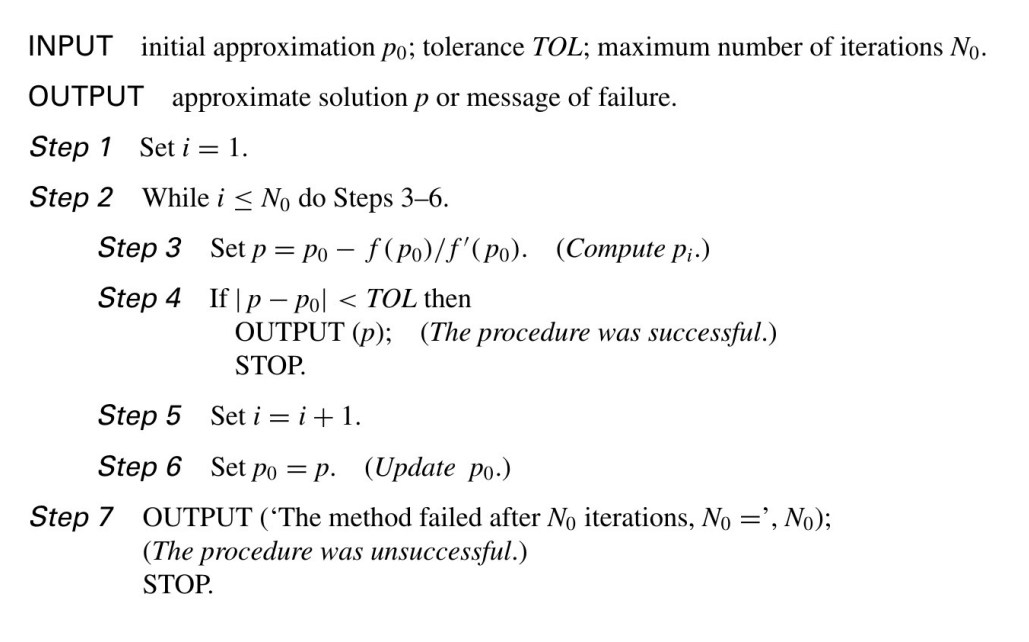

Let us now create this in Python.

First we must import a library called **sympy** to calculate the derivatives.

We also need to assign a symbol so sympy knows what to work with:

In [1]:
import sympy as sym

x = sym.symbols("x")

Now we must define a function, note that any function can be used, for simplicity I will use what was given in L06. We can find the roots analytically:

\begin{equation} f(x) = cos(x) - x \end{equation}

This equation has a root of $x = 0.73908513...$. This is the value we expect to find:

In [2]:
# Do not have to define a python function for this as sympy knows this as an expression (since we defined x)
functionUsed = sym.cos(x) - x

Now let us define the algorithm, we will need the initial approximation, the function, the allowed error, and the max number of iterations.

Note that there are comments intended to help understanding, and be sure to refer to the pseudocode if stuck!

In [3]:
def NewtonsMethod(p0, func, ERR, N):
    i = 1
    d_func = sym.diff(func, x) # derivative of the function
    
    while i <= N: # while not at max iterations
        p = p0 - func.subs(x, p0) / d_func.subs(x, p0) # next approx, subs(x, p0) replaces the x in our function with the value
        
        if abs(p - p0) < ERR: # if difference in previous and next approx. are within allowed error
            print(f"Root = {p}")
            print("Procedure completed successfully.")
            break # ends while loop
        
        p0 = p # update previous
        i += 1
    
    if i > N:
        print(f"Method failed after {N} iterations.")
        print("Procedure was unsuccessful.")

We can now test this algorithm for a root. Note that for a simple function such as this we can get really close to the actual answer with a small amount of iterations!

Further note that if a very bad approximation is given the code may stall, this is because Newtons method only works within a good approximation.

In [4]:
NewtonsMethod(0.5, functionUsed, 0.000000000000001, 10)

Root = 0.739085133215161
Procedure completed successfully.


The following is what a failed procedure looks like (note used a very small number of iterations):

In [5]:
NewtonsMethod(0.5, functionUsed, 0.000000000000001, 1)

Method failed after 1 iterations.
Procedure was unsuccessful.
